# 판다스 개요
- pandas는 데이터 조작 및 분석을 위해 python 프로그래밍 언어로 작성된 소프트웨어 라이브러리이다.
- 판다스는 파이썬계의 엑셀이라 불리운다.
- 공식 사이트: https://pandas.pydata.org

# 판다스에서 사용하는 자료 구조
- 판다스는 일반적으로 pd라는 별칭으로 불러온다.

In [2]:
import pandas as pd

- 판다스의 구성요소
    - Series
    >- DataFrame 중에서 하나의 column에 해당하는 데이터
    >- 1차원 (index, values 2가지 요소로 구성)
    - DataFrame
    >- Data Table 전체를 의미하는 용어
    >- 여러개의 Series를 이용하여 구성
    >- 2차원 (index, column, values 3가지 요소로 구성)
    - Index
    >- Series, DataFrame을 구성하는 이름
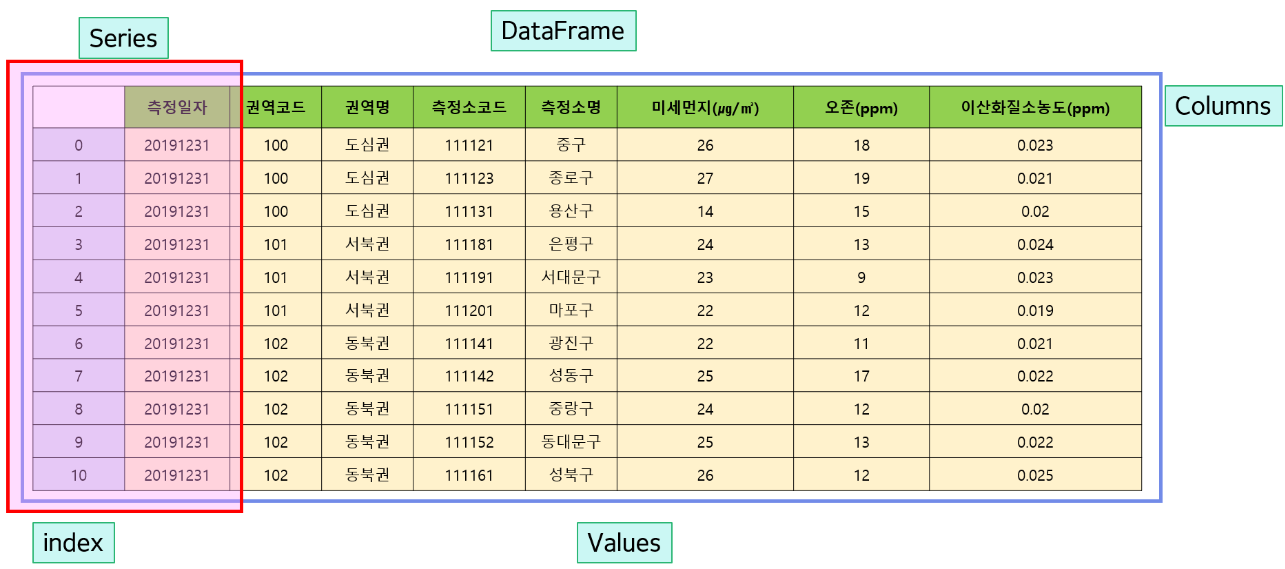

# Series (시리즈)

## 시리즈 생성
- 시리즈는 1차원 배열과 유사하게 사용할 수 있다.
- Series 클래스의 생성자에 리스트를 전달하여 시리즈 객체를 생성할 수 있다.
- 리스트의 요소에 대해 인덱스가 자동으로 생성되어 시리즈 객체를 출력할 때 표시된다.

In [3]:
sr = pd.Series([2,3,5,7,11])
print(sr)

0     2
1     3
2     5
3     7
4    11
dtype: int64


In [4]:
# 명시적으로 인덱스 전달하기
menu_list = ['토스트','제육볶음','치킨']
index_list = ['아침','점심','저녁']
sr = pd.Series(menu_list, index = index_list)
print(sr)

아침     토스트
점심    제육볶음
저녁      치킨
dtype: object


In [6]:
# 인덱스와 값 추출
print(sr.index)
print(sr.values) 
print(type(sr.values))

Index(['아침', '점심', '저녁'], dtype='object')
['토스트' '제육볶음' '치킨']
<class 'numpy.ndarray'>


In [8]:
# 파이썬 딕셔너리를 이용한 Series 생성
dic_data = {'a':21, 'b':22, 'c':23, 'd':24, 'e':25}
sr = pd.Series(dic_data, dtype = 'float32')
print(sr)

a    21.0
b    22.0
c    23.0
d    24.0
e    25.0
dtype: float32


## 원소 선택

In [13]:
import warnings
warnings.filterwarnings(action = 'ignore') # 경고 메세지 삭제

In [16]:
print(sr)
print('-'*30)
# print(sr[0]) # sr.iloc
print(sr.iloc[0])
print('-'*30)
print(sr['b'])
print(sr[:2])
print('-'*30)
print(sr[[0,2]])
print('-'*30)
print(sr['a':'d']) # 인덱스 이름을 이용한 슬라이싱은 마지막 인덱스도 포함한다.

a    21.0
b    22.0
c    23.0
d    24.0
e    25.0
dtype: float32
------------------------------
21.0
------------------------------
22.0
a    21.0
b    22.0
dtype: float32
------------------------------
a    21.0
c    23.0
dtype: float32
------------------------------
a    21.0
b    22.0
c    23.0
d    24.0
dtype: float32


## unique(), value_counts()
- sr.unique(): `결측치를 포함하며` 중복을 제외한 데이터의 종류를 ndarray로 반환
- sr.value_counts(): `결측치를 포함하지 않으며` 데이터의 종류별 개수를 Series로 반환

In [19]:
import numpy as np
sr = pd.Series(['A','B','A', np.NaN, 'C','D','D','A'])
print(sr.unique())
print(sr.value_counts())
# print(sr.value_counts().sort_index()) # 인덱스를 기준으로 정렬

['A' 'B' nan 'C' 'D']
A    3
D    2
B    1
C    1
Name: count, dtype: int64
A    3
B    1
C    1
D    2
Name: count, dtype: int64


# DataFrame(데이터프레임)

## 데이터프레임 생성
- 데이터프레임은 2차원 배열과 유사하게 사용할 수 있다.
- pandas의 DataFrame 클래스의 생성자에 이중 리스트를 전달하여 데이터프레임 객체를 생성할 수 있다.
- 리스트의 요소에 대해 인덱스와 컬럼이 자동으로 생성되어 데이터프레임 객체를 출력할 때 표시된다.

In [22]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]])
display(df) # 서식 적용
print(type(df))

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


<class 'pandas.core.frame.DataFrame'>


In [25]:
# 인덱스와 컬럼을 명시적으로 전달하기

menu_list = [['토스트','시리얼','스크램블'],
            ['제육볶음','칼국수','육개장'],
            ['치킨','삼겹살','라면']]
index = ['아침','점심','저녁']
column = ['월','화','수']
df = pd.DataFrame(menu_list, index = index, columns=column)
display(df)

,월,화,수
아침,토스트,시리얼,스크램블
점심,제육볶음,칼국수,육개장
저녁,치킨,삼겹살,라면


In [27]:
# 인덱스, 컬럼, 값 가져오기
print(df.index)
print(df.columns)
print(df.values)

Index(['아침', '점심', '저녁'], dtype='object')
Index(['월', '화', '수'], dtype='object')
[['토스트' '시리얼' '스크램블']
 ['제육볶음' '칼국수' '육개장']
 ['치킨' '삼겹살' '라면']]


In [30]:
# 딕셔너리를 이용한 데이터프레임 생성
raw_data = {
    '이름': ['홍길동','전우치','손오공','사오정','저팔계'],
    '나이':[32, 27, 30, 31, 33],
    '전화번호' : ['010-1111-1111','010-2222-2222', '010-3333-3333', '010-4444-4444','010-5555-5555'],
    '지역' : ['서울','경기','대구','광주','제주']
}

df = pd.DataFrame(raw_data)
display(df)

,이름,나이,전화번호,지역
0,홍길동,32,010-1111-1111,서울
1,전우치,27,010-2222-2222,경기
2,손오공,30,010-3333-3333,대구
3,사오정,31,010-4444-4444,광주
4,저팔계,33,010-5555-5555,제주


# 데이터 조회 및 처리 

In [4]:
import numpy as np
import pandas as pd

np.random.seed(10)
data = np.random.randint(100, size = (10,10))
df = pd.DataFrame(data, index = list('ABCDEFGHIJ'), columns=list('abcdefghij'))
print(df)

    a   b   c   d   e   f   g   h   i   j
A   9  15  64  28  89  93  29   8  73   0
B  40  36  16  11  54  88  62  33  72  78
C  49  51  54  77  69  13  25  13  92  86
D  30  30  89  12  65  31  57  36  27  18
E  93  77  22  23  94  11  28  74  88   9
F  15  18  80  71  88  11  17  46   7  75
G  28  33  84  96  88  44   5   4  71  88
H  88  50  54  34  15  77  88  15   6  85
I  22  11  12  92  96  62  57  79  42  57
J  97  50  45  40  89  73  37   0  18  23


## 데이터 조회 

### 열 값 읽기
- df['열명'] / df.열명

In [35]:
print(df['a']) # Series 객체로 추출, df.a와 동일

A     9
B    40
C    49
D    30
E    93
F    15
G    28
H    88
I    22
J    97
Name: a, dtype: int32


In [39]:
# 여러 개의 열 값을 읽기 위해서 열 이름을 리스트로 전달한다.
print(df[['a','b']]) # DataFrame 객체로 추출
print(type(df[['a']]))

    a   b
A   9  15
B  40  36
C  49  51
D  30  30
E  93  77
F  15  18
G  28  33
H  88  50
I  22  11
J  97  50
<class 'pandas.core.frame.DataFrame'>


### 행 값 읽기
- df.loc['행명']

In [40]:
df.loc['A'] # 인덱스는 컬럼 명

a     9
b    15
c    64
d    28
e    89
f    93
g    29
h     8
i    73
j     0
Name: A, dtype: int32

In [41]:
# 여러 개의 행 값을 읽기 위해서는 행 이름을 리스트로 전달한다.
df.loc[['A','C','D']]

,a,b,c,d,e,f,g,h,i,j
A,9,15,64,28,89,93,29,8,73,0
C,49,51,54,77,69,13,25,13,92,86
D,30,30,89,12,65,31,57,36,27,18


## df.head(), df.tail()
- 상위(하위) n개의 행을 선택한다.
- 숫자를 전달하지 않으면 5개의 행을 선택한다.

In [42]:
print(df.head(2))

    a   b   c   d   e   f   g   h   i   j
A   9  15  64  28  89  93  29   8  73   0
B  40  36  16  11  54  88  62  33  72  78


In [43]:
print(df.head())

    a   b   c   d   e   f   g   h   i   j
A   9  15  64  28  89  93  29   8  73   0
B  40  36  16  11  54  88  62  33  72  78
C  49  51  54  77  69  13  25  13  92  86
D  30  30  89  12  65  31  57  36  27  18
E  93  77  22  23  94  11  28  74  88   9


In [44]:
print(df.tail(3))

    a   b   c   d   e   f   g   h   i   j
H  88  50  54  34  15  77  88  15   6  85
I  22  11  12  92  96  62  57  79  42  57
J  97  50  45  40  89  73  37   0  18  23


### df.sample()
- n개의 랜덤 데이터 추출
- 매개변수 값이 없으면 1개의 랜덤 데이터 추출

In [46]:
print(df.sample(2))

    a   b   c   d   e   f   g   h   i   j
G  28  33  84  96  88  44   5   4  71  88
F  15  18  80  71  88  11  17  46   7  75


## 데이터 정보 조회

In [50]:
# 컬럼별 데이터 타입 확인 (넘파이와는 다르게 컬럼별로 데이터 타입이 다를 수 있음)
print(df.dtypes)
df['a'] = df['a'].astype(float)
print(df.dtypes) 
# dtype : object -> Series 객체가 object라는 뜻

a    float64
b      int32
c      int32
d      int32
e      int32
f      int32
g      int32
h      int32
i      int32
j      int32
dtype: object
a    float64
b      int32
c      int32
d      int32
e      int32
f      int32
g      int32
h      int32
i      int32
j      int32
dtype: object


In [53]:
# DataFrame의 shape 확인
print(df.shape)

# 열마다 데이터 개수 확인
print(df.count()) # 결측치 제외

(10, 10)
a    10
b    10
c    10
d    10
e    10
f    10
g    10
h    10
i    10
j    10
dtype: int64


In [54]:
# 기술 통계 정보 요약
print(df.describe()) 
# 각 컬럼별 데이터의 편차를 확인 (편차가 크면 스케일링)

               a         b          c          d         e          f  \
count  10.000000  10.00000  10.000000  10.000000  10.00000  10.000000   
mean   47.100000  37.10000  52.000000  48.400000  74.70000  50.300000   
std    33.487809  20.33306  28.233156  32.589023  25.18399  32.492905   
min     9.000000  11.00000  12.000000  11.000000  15.00000  11.000000   
25%    23.500000  21.00000  27.750000  24.250000  66.00000  17.500000   
50%    35.000000  34.50000  54.000000  37.000000  88.00000  53.000000   
75%    78.250000  50.00000  76.000000  75.500000  89.00000  76.000000   
max    97.000000  77.00000  89.000000  96.000000  96.00000  93.000000   

               g          h          i          j  
count  10.000000  10.000000  10.000000  10.000000  
mean   40.500000  30.800000  49.600000  51.900000  
std    24.981104  28.295269  33.437172  35.466573  
min     5.000000   0.000000   6.000000   0.000000  
25%    25.750000   9.250000  20.250000  19.250000  
50%    33.000000  24.000000  5

## 인덱싱, 슬라이싱

In [5]:
print(df)

    a   b   c   d   e   f   g   h   i   j
A   9  15  64  28  89  93  29   8  73   0
B  40  36  16  11  54  88  62  33  72  78
C  49  51  54  77  69  13  25  13  92  86
D  30  30  89  12  65  31  57  36  27  18
E  93  77  22  23  94  11  28  74  88   9
F  15  18  80  71  88  11  17  46   7  75
G  28  33  84  96  88  44   5   4  71  88
H  88  50  54  34  15  77  88  15   6  85
I  22  11  12  92  96  62  57  79  42  57
J  97  50  45  40  89  73  37   0  18  23


### 열 인덱싱/슬라이싱 

In [57]:
df['a']
df[['a','c']]

,a,c
A,9.0,64
B,40.0,16
C,49.0,54
D,30.0,89
E,93.0,22
F,15.0,80
G,28.0,84
H,88.0,54
I,22.0,12
J,97.0,45


<font color= 'red'><b>열의 순서를 이용해서 인덱싱/슬라이싱을 할 수 없다.</b></font>

In [ ]:
# df[0]

- columns 속성의 값을 이용해서 인덱싱이나 슬라이싱을 할 수 있다.

In [64]:
# print(df.columns)
# print(df.columns[0])
print(df[df.columns[0:3]])

      a   b   c
A   9.0  15  64
B  40.0  36  16
C  49.0  51  54
D  30.0  30  89
E  93.0  77  22
F  15.0  18  80
G  28.0  33  84
H  88.0  50  54
I  22.0  11  12
J  97.0  50  45


- 행의 이름을 이용해서 슬라이싱을 할 수 있다.
- 파이썬의 슬라이싱과는 다르게 마지막 요소를 범위에 포함한다.

In [67]:
# print(df['A':'C'])
# 행단위의 추출은 loc 속성을 이용하는 것이 좋다.
print(df.loc['A':'C'])

      a   b   c   d   e   f   g   h   i   j
A   9.0  15  64  28  89  93  29   8  73   0
B  40.0  36  16  11  54  88  62  33  72  78
C  49.0  51  54  77  69  13  25  13  92  86


- 행의 순서를 이용해서 슬라이싱을 할 수 있다.

In [70]:
# df[0:3] # 이 때는 마지막 요소를 포함하지 않음
# 행 단위의 추출은 iloc 속성(위치값)을 이용하는 것이 좋다.
print(df.iloc[0:3])

      a   b   c   d   e   f   g   h   i   j
A   9.0  15  64  28  89  93  29   8  73   0
B  40.0  36  16  11  54  88  62  33  72  78
C  49.0  51  54  77  69  13  25  13  92  86


### df.at[], df.iat[]
- 이름 또는 인덱스를 이용해서 특정 위치의 단일 값을 추출한다.

In [71]:
print(df.at['B','c'])

16


In [75]:
print(df.iat[4,4])

94


- df.loc[[행],[열]] : 행과 열의 이름을 이용해서 해당 범위에 속하는 데이터를 추출한다.
- df.iloc[[행],[열]] : 행과 열의 인덱스를 이용해서 해당 범위에 속하는 데이터를 추출한다.

In [76]:
print(df)

      a   b   c   d   e   f   g   h   i   j
A   9.0  15  64  28  89  93  29   8  73   0
B  40.0  36  16  11  54  88  62  33  72  78
C  49.0  51  54  77  69  13  25  13  92  86
D  30.0  30  89  12  65  31  57  36  27  18
E  93.0  77  22  23  94  11  28  74  88   9
F  15.0  18  80  71  88  11  17  46   7  75
G  28.0  33  84  96  88  44   5   4  71  88
H  88.0  50  54  34  15  77  88  15   6  85
I  22.0  11  12  92  96  62  57  79  42  57
J  97.0  50  45  40  89  73  37   0  18  23


In [77]:
print(df.loc['A', 'a':'e'])

a     9.0
b    15.0
c    64.0
d    28.0
e    89.0
Name: A, dtype: float64


In [78]:
print(df.loc['D':'F', 'd':'f'])

    d   e   f
D  12  65  31
E  23  94  11
F  71  88  11


In [79]:
print(df.iloc[0:5, 5:10])

    f   g   h   i   j
A  93  29   8  73   0
B  88  62  33  72  78
C  13  25  13  92  86
D  31  57  36  27  18
E  11  28  74  88   9


In [81]:
print(df.loc['E':'J', ['a','b','c','c','a']])

      a   b   c   c     a
E  93.0  77  22  22  93.0
F  15.0  18  80  80  15.0
G  28.0  33  84  84  28.0
H  88.0  50  54  54  88.0
I  22.0  11  12  12  22.0
J  97.0  50  45  45  97.0


## 조건 인덱싱
- 조건식을 전달하여 인덱싱할 수 있다.

In [6]:
# df의 a열의 요소 중 50을 초과하는 값이 있을 때 해당 값의 행을 선택
print(df[df['a']>50])

    a   b   c   d   e   f   g   h   i   j
E  93  77  22  23  94  11  28  74  88   9
H  88  50  54  34  15  77  88  15   6  85
J  97  50  45  40  89  73  37   0  18  23


In [8]:
# B행의 값이 50을 초과하는 열만 선택
print(df.loc[:,df.loc['B']>50])

    e   f   g   i   j
A  89  93  29  73   0
B  54  88  62  72  78
C  69  13  25  92  86
D  65  31  57  27  18
E  94  11  28  88   9
F  88  11  17   7  75
G  88  44   5  71  88
H  15  77  88   6  85
I  96  62  57  42  57
J  89  73  37  18  23


In [9]:
# df의 모든 요소 중 짝수만 선택
print(df[df%2==0])

      a     b     c     d     e     f     g     h     i     j
A   NaN   NaN  64.0  28.0   NaN   NaN   NaN   8.0   NaN   0.0
B  40.0  36.0  16.0   NaN  54.0  88.0  62.0   NaN  72.0  78.0
C   NaN   NaN  54.0   NaN   NaN   NaN   NaN   NaN  92.0  86.0
D  30.0  30.0   NaN  12.0   NaN   NaN   NaN  36.0   NaN  18.0
E   NaN   NaN  22.0   NaN  94.0   NaN  28.0  74.0  88.0   NaN
F   NaN  18.0  80.0   NaN  88.0   NaN   NaN  46.0   NaN   NaN
G  28.0   NaN  84.0  96.0  88.0  44.0   NaN   4.0   NaN  88.0
H  88.0  50.0  54.0  34.0   NaN   NaN  88.0   NaN   6.0   NaN
I  22.0   NaN  12.0  92.0  96.0  62.0   NaN   NaN  42.0   NaN
J   NaN  50.0   NaN  40.0   NaN   NaN   NaN   0.0  18.0   NaN


In [12]:
df2 = df.copy() # 원본을 변경하기보다 df.copy로 복사본의 구조를 바꾸는 것이 좋음
df2['k'] = ['one', 'two','one', 'two','one', 'two','one', 'two','one', 'two'] # 열 추가
print(df2)

    a   b   c   d   e   f   g   h   i   j    k
A   9  15  64  28  89  93  29   8  73   0  one
B  40  36  16  11  54  88  62  33  72  78  two
C  49  51  54  77  69  13  25  13  92  86  one
D  30  30  89  12  65  31  57  36  27  18  two
E  93  77  22  23  94  11  28  74  88   9  one
F  15  18  80  71  88  11  17  46   7  75  two
G  28  33  84  96  88  44   5   4  71  88  one
H  88  50  54  34  15  77  88  15   6  85  two
I  22  11  12  92  96  62  57  79  42  57  one
J  97  50  45  40  89  73  37   0  18  23  two


In [13]:
df2['k'].isin(['one']) # True 또는 False의 값 반환, 정확히 일치해야 함

A     True
B    False
C     True
D    False
E     True
F    False
G     True
H    False
I     True
J    False
Name: k, dtype: bool

In [14]:
df2['k'].isin(['one','two']) 

A    True
B    True
C    True
D    True
E    True
F    True
G    True
H    True
I    True
J    True
Name: k, dtype: bool

In [16]:
print(df2[df2['k'].isin(['one'])])

    a   b   c   d   e   f   g   h   i   j    k
A   9  15  64  28  89  93  29   8  73   0  one
C  49  51  54  77  69  13  25  13  92  86  one
E  93  77  22  23  94  11  28  74  88   9  one
G  28  33  84  96  88  44   5   4  71  88  one
I  22  11  12  92  96  62  57  79  42  57  one


In [17]:
# 판다스에서 부정 연산자는 ~을 사용한다.
print(df2[~df2['k'].isin(['one'])]) # k 컬럼의 one이 아닌 값만 출력

    a   b   c   d   e   f   g   h   i   j    k
B  40  36  16  11  54  88  62  33  72  78  two
D  30  30  89  12  65  31  57  36  27  18  two
F  15  18  80  71  88  11  17  46   7  75  two
H  88  50  54  34  15  77  88  15   6  85  two
J  97  50  45  40  89  73  37   0  18  23  two


# 데이터 수정
- 인덱싱과 슬라이싱을 통해 선택된 위치에 새로운 값을 대입하여 데이터를 수정할 수 있다.

In [19]:
df['e'] = 0 # e 컬럼의 모든 값들이 다 e로 바뀜
print(df)

    a   b   c   d  e   f   g   h   i   j
A   9  15  64  28  0  93  29   8  73   0
B  40  36  16  11  0  88  62  33  72  78
C  49  51  54  77  0  13  25  13  92  86
D  30  30  89  12  0  31  57  36  27  18
E  93  77  22  23  0  11  28  74  88   9
F  15  18  80  71  0  11  17  46   7  75
G  28  33  84  96  0  44   5   4  71  88
H  88  50  54  34  0  77  88  15   6  85
I  22  11  12  92  0  62  57  79  42  57
J  97  50  45  40  0  73  37   0  18  23


In [20]:
df.loc['E':'F'] = 0
print(df)

    a   b   c   d  e   f   g   h   i   j
A   9  15  64  28  0  93  29   8  73   0
B  40  36  16  11  0  88  62  33  72  78
C  49  51  54  77  0  13  25  13  92  86
D  30  30  89  12  0  31  57  36  27  18
E   0   0   0   0  0   0   0   0   0   0
F   0   0   0   0  0   0   0   0   0   0
G  28  33  84  96  0  44   5   4  71  88
H  88  50  54  34  0  77  88  15   6  85
I  22  11  12  92  0  62  57  79  42  57
J  97  50  45  40  0  73  37   0  18  23


In [21]:
df.at['E','e'] = 1
print(df)

    a   b   c   d  e   f   g   h   i   j
A   9  15  64  28  0  93  29   8  73   0
B  40  36  16  11  0  88  62  33  72  78
C  49  51  54  77  0  13  25  13  92  86
D  30  30  89  12  0  31  57  36  27  18
E   0   0   0   0  1   0   0   0   0   0
F   0   0   0   0  0   0   0   0   0   0
G  28  33  84  96  0  44   5   4  71  88
H  88  50  54  34  0  77  88  15   6  85
I  22  11  12  92  0  62  57  79  42  57
J  97  50  45  40  0  73  37   0  18  23


In [22]:
df.loc['D':'G', 'd':'g'] = -2
print(df)

    a   b   c   d  e   f   g   h   i   j
A   9  15  64  28  0  93  29   8  73   0
B  40  36  16  11  0  88  62  33  72  78
C  49  51  54  77  0  13  25  13  92  86
D  30  30  89  -2 -2  -2  -2  36  27  18
E   0   0   0  -2 -2  -2  -2   0   0   0
F   0   0   0  -2 -2  -2  -2   0   0   0
G  28  33  84  -2 -2  -2  -2   4  71  88
H  88  50  54  34  0  77  88  15   6  85
I  22  11  12  92  0  62  57  79  42  57
J  97  50  45  40  0  73  37   0  18  23


# 데이터 정렬

In [23]:
import numpy as np
import pandas as pd

np.random.seed(10)
data = np.random.randint(100, size = (10,10))
df = pd.DataFrame(data, index = list('ABCDEFGHIJ'), columns=list('abcdefghij'))
print(df)

    a   b   c   d   e   f   g   h   i   j
A   9  15  64  28  89  93  29   8  73   0
B  40  36  16  11  54  88  62  33  72  78
C  49  51  54  77  69  13  25  13  92  86
D  30  30  89  12  65  31  57  36  27  18
E  93  77  22  23  94  11  28  74  88   9
F  15  18  80  71  88  11  17  46   7  75
G  28  33  84  96  88  44   5   4  71  88
H  88  50  54  34  15  77  88  15   6  85
I  22  11  12  92  96  62  57  79  42  57
J  97  50  45  40  89  73  37   0  18  23


## df.sort_values()
- 행 또는 열을 하나 지정해서 값에 따라 정렬한다.
- 기본 값은 열을 지정해서 값에 따라 오름차순으로 정렬하는 것이다.
- 내림차순으로 정렬하려면 ascending 인수에 False값을 전달한다.

In [25]:
print(df.sort_values('a', ascending=False)) 

    a   b   c   d   e   f   g   h   i   j
J  97  50  45  40  89  73  37   0  18  23
E  93  77  22  23  94  11  28  74  88   9
H  88  50  54  34  15  77  88  15   6  85
C  49  51  54  77  69  13  25  13  92  86
B  40  36  16  11  54  88  62  33  72  78
D  30  30  89  12  65  31  57  36  27  18
G  28  33  84  96  88  44   5   4  71  88
I  22  11  12  92  96  62  57  79  42  57
F  15  18  80  71  88  11  17  46   7  75
A   9  15  64  28  89  93  29   8  73   0


- 행을 지정해서 정렬하려면 axis 인수에 1 또는 'columns'를 전달한다.

In [27]:
print(df.sort_values('A', axis = 1))

    j   h   a   b   d   g   c   i   e   f
A   0   8   9  15  28  29  64  73  89  93
B  78  33  40  36  11  62  16  72  54  88
C  86  13  49  51  77  25  54  92  69  13
D  18  36  30  30  12  57  89  27  65  31
E   9  74  93  77  23  28  22  88  94  11
F  75  46  15  18  71  17  80   7  88  11
G  88   4  28  33  96   5  84  71  88  44
H  85  15  88  50  34  88  54   6  15  77
I  57  79  22  11  92  57  12  42  96  62
J  23   0  97  50  40  37  45  18  89  73


## df.sort_index()
- 행 또는 열에 대해 정렬한다.
- 기본 값은 인덱스를 오름차순으로 정렬하는 것이다.
- 컬럼명에 따라 내림차순으로 정렬하려면 axis 인수와 ascending 인수를 설정한다.

In [29]:
print(df.sort_index(ascending = False))

    a   b   c   d   e   f   g   h   i   j
J  97  50  45  40  89  73  37   0  18  23
I  22  11  12  92  96  62  57  79  42  57
H  88  50  54  34  15  77  88  15   6  85
G  28  33  84  96  88  44   5   4  71  88
F  15  18  80  71  88  11  17  46   7  75
E  93  77  22  23  94  11  28  74  88   9
D  30  30  89  12  65  31  57  36  27  18
C  49  51  54  77  69  13  25  13  92  86
B  40  36  16  11  54  88  62  33  72  78
A   9  15  64  28  89  93  29   8  73   0


In [31]:
print(df.sort_index(axis='columns', ascending = False))

    j   i   h   g   f   e   d   c   b   a
A   0  73   8  29  93  89  28  64  15   9
B  78  72  33  62  88  54  11  16  36  40
C  86  92  13  25  13  69  77  54  51  49
D  18  27  36  57  31  65  12  89  30  30
E   9  88  74  28  11  94  23  22  77  93
F  75   7  46  17  11  88  71  80  18  15
G  88  71   4   5  44  88  96  84  33  28
H  85   6  15  88  77  15  34  54  50  88
I  57  42  79  57  62  96  92  12  11  22
J  23  18   0  37  73  89  40  45  50  97


# 데이터프레임 조작

## 새로운 행 또는 열 추가
- DataFrame에 새로운 열 추가
    - df[열이름] = 데이터 목록(리스트, 시리즈 객체)
    - 새로 추가되는 데이터 목록은 기존 데이터의 행(레코드) 수와 같아야 한다.
- DataFrame에 새로운 행 추가
    - df.loc[행이름] = 데이터 목록

In [42]:
import pandas as pd 

df = pd.DataFrame([[1,2,3],[7,8,9],[13,14,15]], index=list('ABC'), columns = list('abc'))
print(df)

    a   b   c
A   1   2   3
B   7   8   9
C  13  14  15


In [43]:
# 새로운 행 추가
df.loc['D'] = [19,20,21]
print(df)

    a   b   c
A   1   2   3
B   7   8   9
C  13  14  15
D  19  20  21


In [44]:
# 새로운 열 추가
df['d'] = [4, 10, 16, 22]
print(df)

    a   b   c   d
A   1   2   3   4
B   7   8   9  10
C  13  14  15  16
D  19  20  21  22


- 시리즈를 이용한 새로운 행 또는 열 추가
    - `기존 데이터프레임과 같은 인덱스를 갖도록` 설정한다.
    - 인덱스를 명확하게 명시하지 않으면 추가되는 요소는 NaN으로 초기화 된다.

In [45]:
df.loc['E'] = pd.Series([25,26,27,28], index = df.columns) 
print(df) # 결측치가 들어가면 데이터가 모두 실수형으로 변환

    a   b   c   d
A   1   2   3   4
B   7   8   9  10
C  13  14  15  16
D  19  20  21  22
E  25  26  27  28


In [46]:
df['e'] = pd.Series([5,11,17,23,29], index=df.index)
print(df)

    a   b   c   d   e
A   1   2   3   4   5
B   7   8   9  10  11
C  13  14  15  16  17
D  19  20  21  22  23
E  25  26  27  28  29


## 임의의 위치에 열 삽입
- df.insert(위치, 컬럼명, 값)

In [47]:
df.insert(1, 'f', [1,1,1,1,1])
print(df)

    a  f   b   c   d   e
A   1  1   2   3   4   5
B   7  1   8   9  10  11
C  13  1  14  15  16  17
D  19  1  20  21  22  23
E  25  1  26  27  28  29


# 행/열의 변경

In [62]:
df = pd.DataFrame(np.arange(1,10).reshape((3,3)), columns = list('abc'))
print(df)

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


## df.reindex()
- 인덱스 구조를 변경하면서 새로운 행 또는 열을 추가한다.
- 추가되는 행 또는 열의 요소는 NaN으로 초기화 된다.
- 실행 결과는 원본에 영향을 주지 않고 `새로운 데이터프레임 객체를 반환`한다.

In [52]:
df2 = df.reindex(index=[0,1,2,3], columns=list('abcd'), fill_value=0) # fill_value 값으로 새 행과 열의 값을 채움
print(df2)
print(df)

   a  b  c  d
0  1  2  3  0
1  4  5  6  0
2  7  8  9  0
3  0  0  0  0
   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


- 행 또는 열의 순서를 섞을 수 있다.
- 또는 기존에 존재하던 인덱스를 생략해서 행 또는 열을 삭제할 수도 있다.

In [57]:
df2 = df.reindex(index=[0,1], columns = ['b','a','c'])
print(df2)

     b   a    c
a              
0  NaN NaN  NaN
1  2.0 NaN  3.0


## df.set_index()
- 열을 인덱스로 만든다. ex) date 날짜 컬럼을 인덱스로 만듦
- df.set_index(컬럼이름), inplace = True 값을 전달하여 원본을 수정할 수 있다.

In [63]:
df2 = df.set_index('a', inplace=True)
print(df)

   b  c
a      
1  2  3
4  5  6
7  8  9


## df.reset_index()
- 인덱스를 열 데이터로 추가
- 인덱스를 초기화: drop=True 인수를 전달하면 기존 인덱스를 삭제하고 기본 값으로 다시 초기화한다.
ex) 데이터 추가를 반복하며 인덱스의 순서가 뒤죽박죽 되었을 때 정렬을 위해 사용

In [64]:
print(df)

   b  c
a      
1  2  3
4  5  6
7  8  9


In [65]:
df2 = df.reset_index()
print(df2)

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


In [67]:
df2 = df.reset_index(drop=True)
print(df2)

   b  c
0  2  3
1  5  6
2  8  9


# 행/열의 삭제  
(일반적으로 행/열을 삭제할 때 reindex를 쓰지는 않음)

In [69]:
import pandas as pd

df = pd.DataFrame([[1,2],[3,4]], index=list('AB'),columns= list('ab'))
print(df)

   a  b
A  1  2
B  3  4


## DataFrame의 행 제거
- df.drop(행이름), df.drop([행이름1, 행이름2, ....])
- drop 함수는 기본적으로 행 이름으로 인식
- axis = 0이 기본값으로, 생략해도 된다.
- 실행 결과는 원본에 영향을 주지 않고 새로운 데이터프레임 객체를 반환한다.

In [70]:
df2 = df.drop('A')
print(df2)

   a  b
B  3  4


## DataFrame의 열 제거
- df.drop(열이름, axis = 1), df.drop([열이름1, 열이름2,....], axis = 1)

In [71]:
df2 = df.drop('a', axis = 1)
print(df2)

   b
A  2
B  4


# 행/열 이름 바꾸기

In [72]:
df = pd.DataFrame(np.random.randint(1,101,(4,4)))
print(df)

    0   1   2   3
0   4  30  17  85
1  83  15  52  80
2  18  51  54  26
3  49  18  33  82


## 전체 행/열 이름 바꾸기

In [73]:
df.columns = ['C1','C2','C3','C4']
df.index = list('abcd')
print(df)

   C1  C2  C3  C4
a   4  30  17  85
b  83  15  52  80
c  18  51  54  26
d  49  18  33  82


## 특정 행/열 이름 바꾸기
- df.rename(index=dictionary객체)
- df.rename(columns=dictionary객체)

In [74]:
df.rename(index={'a':'A'}, inplace = True)
df.rename(columns={'C1':'국어'}, inplace=True)
print(df)

   국어  C2  C3  C4
A   4  30  17  85
b  83  15  52  80
c  18  51  54  26
d  49  18  33  82


## 행/열 이름의 특정 문자 변경하기

In [75]:
df.index=list('ABCD')
df.columns = ['4기 A반','4기 B반','5기 A반','5기 B반']
print(df)

   4기 A반  4기 B반  5기 A반  5기 B반
A      4     30     17     85
B     83     15     52     80
C     18     51     54     26
D     49     18     33     82


- `str` 변수에는 문자열 객체가 할당되어 있다. 따라서 파이썬 문자열 객체가 제공하는 함수를 이용할 수 있다.

In [76]:
df.columns = df.columns.str.replace(' ','-')
print(df)

   4기-A반  4기-B반  5기-A반  5기-B반
A      4     30     17     85
B     83     15     52     80
C     18     51     54     26
D     49     18     33     82


## 컬럼명에 접두사 및 접미사 붙이기

In [77]:
df2 = df.add_prefix('KDM-')
print(df2)

   KDM-4기-A반  KDM-4기-B반  KDM-5기-A반  KDM-5기-B반
A          4         30         17         85
B         83         15         52         80
C         18         51         54         26
D         49         18         33         82


In [78]:
df2 = df.add_suffix('-1학기')
print(df2)

   4기-A반-1학기  4기-B반-1학기  5기-A반-1학기  5기-B반-1학기
A          4         30         17         85
B         83         15         52         80
C         18         51         54         26
D         49         18         33         82


# 데이터프레임 간의 조합

In [79]:
df = pd.DataFrame([[1,2],[3,4]], index = list('AB'), columns = list('ab'))
print(df)

   a  b
A  1  2
B  3  4


## pd.concat()
- 두 개 이상의 데이터프레임을 행 또는 열 방향으로 연결한다.
- axis = 0 값이 기본 값으로 행 방향으로 연결한다.
- 열 방향으로 연결하고자 할 경우 axis = 1 인자를 전달한다.
- 행 방향으로 연결하고자 할 때는 열 이름이 같아야 하고, 열 방향으로 연결하고자 할 경우에는 행 이름이 같아야 한다.
- 실행 결과는 원본에 영향을 주지 않고 새로운 데이터프레임 객체를 반환한다. 

In [80]:
df2 = pd.concat([df, df])
print(df2)

   a  b
A  1  2
B  3  4
A  1  2
B  3  4


In [81]:
df3 = pd.DataFrame([[5,6],[7,8]], index=df.index, columns = list('cd'))
print(df3)

   c  d
A  5  6
B  7  8


In [82]:
df4 = pd.concat([df, df3], axis = 1)
print(df4)

   a  b  c  d
A  1  2  5  6
B  3  4  7  8


# 통계

In [94]:
import numpy as np
import pandas as pd

np.random.seed(10)
df = pd.DataFrame(np.random.randint(100, size = (10,10)), index = list('ABCDEFGHIJ'), columns = list('abcdefghij'))
print(df)

    a   b   c   d   e   f   g   h   i   j
A   9  15  64  28  89  93  29   8  73   0
B  40  36  16  11  54  88  62  33  72  78
C  49  51  54  77  69  13  25  13  92  86
D  30  30  89  12  65  31  57  36  27  18
E  93  77  22  23  94  11  28  74  88   9
F  15  18  80  71  88  11  17  46   7  75
G  28  33  84  96  88  44   5   4  71  88
H  88  50  54  34  15  77  88  15   6  85
I  22  11  12  92  96  62  57  79  42  57
J  97  50  45  40  89  73  37   0  18  23


## df.describe()
- 각 열에 대한 주요 통계 수치들을 산출한다.

In [95]:
print(df.describe()['a']) # describe 함수의 결과는 데이터프레임으로 넘어온다.
print(df.describe().loc['std']) 

count    10.000000
mean     47.100000
std      33.487809
min       9.000000
25%      23.500000
50%      35.000000
75%      78.250000
max      97.000000
Name: a, dtype: float64
a    33.487809
b    20.333060
c    28.233156
d    32.589023
e    25.183990
f    32.492905
g    24.981104
h    28.295269
i    33.437172
j    35.466573
Name: std, dtype: float64


## df.count()
- 각 행/열에 대해 non-NA 요소의 개수를 산출한다.

In [96]:
# 각 열의 요소의 개수
print(df.count())

a    10
b    10
c    10
d    10
e    10
f    10
g    10
h    10
i    10
j    10
dtype: int64


In [97]:
# 각 행의 요소의 개수
print(df.count(axis = 1))

A    10
B    10
C    10
D    10
E    10
F    10
G    10
H    10
I    10
J    10
dtype: int64


## df.mean()
- 각 행/열에 대한 평균을 산출한다.

In [98]:
print(df.mean())

a    47.1
b    37.1
c    52.0
d    48.4
e    74.7
f    50.3
g    40.5
h    30.8
i    49.6
j    51.9
dtype: float64


## df.std()
- 각 행/열에 대한 표준편차를 산출한다.

In [99]:
print(df.std())

a    33.487809
b    20.333060
c    28.233156
d    32.589023
e    25.183990
f    32.492905
g    24.981104
h    28.295269
i    33.437172
j    35.466573
dtype: float64


## df.min()/df.max()
- 각 행과 열에 대한 최소/최대 값을 산출한다.

In [100]:
print(df.min())

a     9
b    11
c    12
d    11
e    15
f    11
g     5
h     0
i     6
j     0
dtype: int32


[문제] 다음 요구사항에 맞는 DataFrame을 생성하세요.
1. 각 컬럼 값은 Series 객체로 생성
2. 앞서 만든 Series 객체를 이용해서 DataFrame을 생성
3. 각 과목의 합계를 계산한 컬럼을 추가
4. 각 과목의 평균을 계산한 컬럼을 추가

In [154]:
index_list = ['홍길동','임꺽정','전우치','손오공','저팔계','사오정']
sr_major = pd.Series(['컴퓨터공학과','수학과','정보통신학과','수학과','컴퓨터공학과','컴퓨터공학과'], index = index_list)
print(sr_major)
sr_mat = pd.Series([97, 88 ,91, 76,88,87], index = index_list)
sr_kor = pd.Series([88,89,85,90,88,77], index= index_list)
sr_eng = pd.Series([90,100,96,91,80,90], index= index_list)

홍길동    컴퓨터공학과
임꺽정       수학과
전우치    정보통신학과
손오공       수학과
저팔계    컴퓨터공학과
사오정    컴퓨터공학과
dtype: object


In [160]:
df = pd.DataFrame({'전공':sr_major,'수학':sr_mat, '국어':sr_kor, '영어':sr_eng})
df

,전공,수학,국어,영어
홍길동,컴퓨터공학과,97,88,90
임꺽정,수학과,88,89,100
전우치,정보통신학과,91,85,96
손오공,수학과,76,90,91
저팔계,컴퓨터공학과,88,88,80
사오정,컴퓨터공학과,87,77,90


In [164]:
# df[['수학','국어','영어']].sum(axis = 1)
df.loc[:, '수학':'영어'].sum(axis = 1)

홍길동    275
임꺽정    277
전우치    272
손오공    257
저팔계    256
사오정    254
dtype: int64

In [171]:
df['합계'] = df.loc[:, '수학':'영어'].sum(axis = 1)
df['평균'] = df.loc[:, '수학':'영어'].mean(axis = 1)
print(df)

         전공  수학  국어   영어   합계         평균
홍길동  컴퓨터공학과  97  88   90  275  91.666667
임꺽정     수학과  88  89  100  277  92.333333
전우치  정보통신학과  91  85   96  272  90.666667
손오공     수학과  76  90   91  257  85.666667
저팔계  컴퓨터공학과  88  88   80  256  85.333333
사오정  컴퓨터공학과  87  77   90  254  84.666667


In [172]:
df['평균'] = df['평균'].map(lambda x:f'{x:.2f}') # 평균 컬럼의 값이 하나씩 x에 들어감 
print(df)

         전공  수학  국어   영어   합계     평균
홍길동  컴퓨터공학과  97  88   90  275  91.67
임꺽정     수학과  88  89  100  277  92.33
전우치  정보통신학과  91  85   96  272  90.67
손오공     수학과  76  90   91  257  85.67
저팔계  컴퓨터공학과  88  88   80  256  85.33
사오정  컴퓨터공학과  87  77   90  254  84.67


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 홍길동 to 사오정
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전공      6 non-null      object 
 1   수학      6 non-null      int64  
 2   국어      6 non-null      int64  
 3   영어      6 non-null      int64  
 4   합계      6 non-null      int64  
 5   평균      6 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 508.0+ bytes


In [174]:
df['평균'] = df['평균'].astype(float) # lambda식 이후의 평균값은 문자열이기 때문에 실수형으로 변환

# 결측값 처리 (중요)

In [176]:
import numpy as np
import pandas as pd

np.random.seed(10)
df = pd.DataFrame(np.random.randint(10, size = (5,5)), index = list('ABCDE'), columns = list('abcde'))
df.at['B','c'] = None
df.at['D','e'] = np.nan # None을 나타내는 상수
print(df)

   a  b    c  d    e
A  9  4  0.0  1  9.0
B  0  1  NaN  9  0.0
C  8  6  4.0  3  0.0
D  4  6  8.0  1  NaN
E  4  1  3.0  6  5.0


## df.isna(), df.notna()
- 데이터가 NaN인지 아닌지 검사
- isna -> 결측치면 True, notna -> 결측치가 아니면 True

In [179]:
check_na = df.isna()
print(check_na)

       a      b      c      d      e
A  False  False  False  False  False
B  False  False   True  False  False
C  False  False  False  False  False
D  False  False  False  False   True
E  False  False  False  False  False


In [180]:
# 컬럼별 결측치 데이터 수 확인
print(check_na.sum())

a    0
b    0
c    1
d    0
e    1
dtype: int64


In [181]:
print(df.info()) # Non-Null Count : 결측치 제외한 개수

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A to E
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       5 non-null      int32  
 1   b       5 non-null      int32  
 2   c       4 non-null      float64
 3   d       5 non-null      int32  
 4   e       4 non-null      float64
dtypes: float64(2), int32(3)
memory usage: 352.0+ bytes
None


## df.dropna()
- 결측값이 존재하는 행 또는 열을 삭제한다.
- 기본 설정은 결측값이 존재하는 행을 모두 제거하는 방식이다.

In [182]:
cleared_row_df = df.dropna()
print(cleared_row_df)

   a  b    c  d    e
A  9  4  0.0  1  9.0
C  8  6  4.0  3  0.0
E  4  1  3.0  6  5.0


In [183]:
cleared_col_df = df.dropna(axis = 1)
print(cleared_col_df)

   a  b  d
A  9  4  1
B  0  1  9
C  8  6  3
D  4  6  1
E  4  1  6


- `subset 인수`를 설정하면 모든 컬럼이 아닌 특정 컬럼의 결측값 데이터만 삭제한다.

In [184]:
# c 컬럼의 결측값이 있는 행을 삭제한다.
cleared_row_df = df.dropna(subset = ['c'])
print(cleared_row_df)

   a  b    c  d    e
A  9  4  0.0  1  9.0
C  8  6  4.0  3  0.0
D  4  6  8.0  1  NaN
E  4  1  3.0  6  5.0


## df.fillna()
- 결측값을 다른 값으로 채운다.

In [185]:
filled_df = df.fillna(-999)
print(filled_df)

   a  b      c  d      e
A  9  4    0.0  1    9.0
B  0  1 -999.0  9    0.0
C  8  6    4.0  3    0.0
D  4  6    8.0  1 -999.0
E  4  1    3.0  6    5.0


In [186]:
# 결측값을 해당 컬럼의 평균 값으로 채우기
df['c'] = df['c'].fillna(df['c'].mean())
print(df)

   a  b     c  d    e
A  9  4  0.00  1  9.0
B  0  1  3.75  9  0.0
C  8  6  4.00  3  0.0
D  4  6  8.00  1  NaN
E  4  1  3.00  6  5.0


In [ ]:
## df.ffill() / df.bfill()
- ffill() : 결측값의 앞 값으로 채운다.
- bfill() : 결측값의 뒤의 값으로 채운다.

In [187]:
filled_df2 = df.ffill()
print(filled_df2)

   a  b     c  d    e
A  9  4  0.00  1  9.0
B  0  1  3.75  9  0.0
C  8  6  4.00  3  0.0
D  4  6  8.00  1  0.0
E  4  1  3.00  6  5.0


In [188]:
filled_df3 = df.bfill()
print(filled_df3)

   a  b     c  d    e
A  9  4  0.00  1  9.0
B  0  1  3.75  9  0.0
C  8  6  4.00  3  0.0
D  4  6  8.00  1  5.0
E  4  1  3.00  6  5.0


# 중복 데이터 제거

In [189]:
import pandas as pd

df = pd.DataFrame({'k1':['one','two']*3 + ['two'],
                  'k2':[1,1,2,3,3,4,4]})
print(df)

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4
6  two   4


## df.duplicated()
- 각 행의 중복여부를 확인하여 True/False 값으로 알려준다.

In [190]:
print(df.duplicated())

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool


## df.drop_duplicates()
- 모든 컬럼에 대해 중복된 값을 갖는 행을 제거한 데이터프레임을 반환한다.

In [191]:
rm_duplicated = df.drop_duplicates()
print(rm_duplicated)

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4


## df.drop_duplicats(컬럼명 리스트)
- 매개변수로 주어진 컬럼명 목록에 대해 같은 값을 갖는 행을 제거한 데이터프레임을 반환한다.

In [192]:
df['v1'] = np.arange(7)
print(df)

    k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
5  two   4   5
6  two   4   6


In [193]:
print(df.duplicated())

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool


In [194]:
rm_duplicated = df.drop_duplicates(['k1','k2']) # k1과 k2만 중복이어도 레코드 삭제
print(rm_duplicated)

    k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
5  two   4   5


## keep = 'last' 파라메터
- drop_duplicates는 기본적으로 처음 발견된 데이터를 유지한다.
- keep='last' 파라메터를 지정하면 마지막으로 발견된 값을 유지한다.

In [195]:
rm_duplicated = df.drop_duplicates(['k1','k2'],keep = 'last')
print(rm_duplicated)

    k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
6  two   4   6


# 데이터프레임 재구조화

In [198]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.arange(16).reshape((4,4)), index = list('ABCD'), columns = list('abcd'))
year_df = pd.DataFrame([2021, 2022, 2021, 2022], index = list('ABCD'), columns = ['year'])
class_df = pd.DataFrame(list('AABB'), index = list('ABCD'), columns=['class'])
df = pd.concat([year_df, class_df, df], axis = 1)
print(df)

   year class   a   b   c   d
A  2021     A   0   1   2   3
B  2022     A   4   5   6   7
C  2021     B   8   9  10  11
D  2022     B  12  13  14  15


## pd.pivot_table() (=df.pivot_table())
- 지정된 index와 column으로 사용하는 피벗 테이블을 생성한다.
- 피벗 테이블 : 기존 데이터를 기반으로 합계나 평균 등의 통계를 산출하기 위해 새로운 구조의 표를 만드는 기능
- 데이터에서 특정 컬럼 항목으로만 정렬하고 싶을 때 피벗 페이블을 사용한다. 그렇게 되면 해당 컬럼이 index가 되고, 중복된 칼럼의 항목은 하나로 합쳐지고 값들의 평균을 가지게 된다.
- df.pivot_table(index = 행방향 컬럼, columns = 열방향 컬럼, values = 집계대상 컬럼, aggfunc = 구할 통계값)

In [199]:
pivot = pd.pivot_table(df, index = 'year', columns = 'class')
print(pivot)

         a          b          c          d      
class    A     B    A     B    A     B    A     B
year                                             
2021   0.0   8.0  1.0   9.0  2.0  10.0  3.0  11.0
2022   4.0  12.0  5.0  13.0  6.0  14.0  7.0  15.0


In [200]:
pivot = pd.pivot_table(df, index = ['year','class'])
print(pivot)

               a     b     c     d
year class                        
2021 A       0.0   1.0   2.0   3.0
     B       8.0   9.0  10.0  11.0
2022 A       4.0   5.0   6.0   7.0
     B      12.0  13.0  14.0  15.0


In [202]:
# 연도를 기준으로 각 컬럼의 평균 값이 하나로 합쳐진 후 평균 값이 표시됨
# aggfunc = np.mean 기본 값으로 설정되어 있음
pivot = pd.pivot_table(df, index = 'year', values = ['a','b','c','d']) 
print(pivot) # 2021년의 A와 B 값의 평균, 2022년의 A와 B 값의 평균

        a    b     c     d
year                      
2021  4.0  5.0   6.0   7.0
2022  8.0  9.0  10.0  11.0


In [205]:
# 연도를 기준으로 각 컬럼의 합계 계산
pivot = pd.pivot_table(df, index = 'year', values = ['a','b','c','d'], aggfunc=np.sum) 
print(pivot)

       a   b   c   d
year                
2021   8  10  12  14
2022  16  18  20  22


C:\Users\user\AppData\Local\Temp\ipykernel_15940\2485771582.py:1: FutureWarning: The provided callable <function sum at 0x0000025F0F29B240> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(df, index = 'year', values = ['a','b','c','d'], aggfunc=np.sum)


In [206]:
pivot = pd.pivot_table(df, index = 'year', values = ['a','b','c','d'], aggfunc=['sum','mean']) 
print(pivot)

     sum             mean                 
       a   b   c   d    a    b     c     d
year                                      
2021   8  10  12  14  4.0  5.0   6.0   7.0
2022  16  18  20  22  8.0  9.0  10.0  11.0


In [207]:
# 멀티 인덱스
print(pivot.columns)

MultiIndex([( 'sum', 'a'),
            ( 'sum', 'b'),
            ( 'sum', 'c'),
            ( 'sum', 'd'),
            ('mean', 'a'),
            ('mean', 'b'),
            ('mean', 'c'),
            ('mean', 'd')],
           )


[실습] 피벗 테이블 실습
- 'benefit' 컬럼 추가 : 매출('sales') - 비용('cost')
- 피봇을 활용하여 연도별 분기 이익 데이터 확인
- 연도별 이익의 평균/합계 계산

In [212]:
sr_year = pd.Series([2020]*4+[2021]*4+[2022]*4)
sr_quarter = pd.Series(['1Q','2Q','3Q','4Q']*3)
np.random.seed(0)
sr_sales = pd.Series(np.random.randint(500,6000,12))
sr_cost = pd.Series(np.random.randint(100,1200,12))

df = pd.DataFrame({'year':sr_year, 'quarter':sr_quarter, 'sales':sr_sales, 'cost':sr_cost})
print(df)

    year quarter  sales  cost
0   2020      1Q   3232   274
1   2020      2Q   3107   949
2   2020      3Q   2153   637
3   2020      4Q   3764   945
4   2021      1Q   5431   172
5   2021      2Q   5359   877
6   2021      3Q   1533   215
7   2021      4Q   4873  1076
8   2022      1Q   3968   855
9   2022      2Q   1205   548
10  2022      3Q   3099   950
11  2022      4Q   2635   199


In [215]:
# 'benefit' 컬럼 추가 : 매출('sales') - 비용('cost')
df['benefit'] = df['sales'] - df['cost']
print(df)

    year quarter  sales  cost  benefit
0   2020      1Q   3232   274     2958
1   2020      2Q   3107   949     2158
2   2020      3Q   2153   637     1516
3   2020      4Q   3764   945     2819
4   2021      1Q   5431   172     5259
5   2021      2Q   5359   877     4482
6   2021      3Q   1533   215     1318
7   2021      4Q   4873  1076     3797
8   2022      1Q   3968   855     3113
9   2022      2Q   1205   548      657
10  2022      3Q   3099   950     2149
11  2022      4Q   2635   199     2436


In [216]:
# 피봇을 활용하여 연도별 분기 이익 데이터 확인
df_pivot = pd.pivot_table(df, index = 'year', columns= 'quarter', values = 'benefit')
print(df_pivot)

quarter      1Q      2Q      3Q      4Q
year                                   
2020     2958.0  2158.0  1516.0  2819.0
2021     5259.0  4482.0  1318.0  3797.0
2022     3113.0   657.0  2149.0  2436.0


In [217]:
# 피봇을 활용하여 연도별 분기 이익 데이터 확인
df_pivot = pd.pivot_table(df, index = ['year','quarter'], values = 'benefit')
print(df_pivot)

              benefit
year quarter         
2020 1Q        2958.0
     2Q        2158.0
     3Q        1516.0
     4Q        2819.0
2021 1Q        5259.0
     2Q        4482.0
     3Q        1318.0
     4Q        3797.0
2022 1Q        3113.0
     2Q         657.0
     3Q        2149.0
     4Q        2436.0


In [219]:
# 연도별 이익의 평균/합계 계산
df_pivot = pd.pivot_table(df, index = 'year', values = 'benefit', aggfunc = ['sum','mean']) # 분기 데이터는 하나로 합쳐짐
print(df_pivot)

         sum     mean
     benefit  benefit
year                 
2020    9451  2362.75
2021   14856  3714.00
2022    8355  2088.75


In [221]:
currency_format = df.copy()
for col in ['sales','cost','benefit']:
    currency_format[col] = currency_format[col].map(lambda x:f'￦{x:,}')

In [222]:
print(currency_format)

    year quarter   sales    cost benefit
0   2020      1Q  ￦3,232    ￦274  ￦2,958
1   2020      2Q  ￦3,107    ￦949  ￦2,158
2   2020      3Q  ￦2,153    ￦637  ￦1,516
3   2020      4Q  ￦3,764    ￦945  ￦2,819
4   2021      1Q  ￦5,431    ￦172  ￦5,259
5   2021      2Q  ￦5,359    ￦877  ￦4,482
6   2021      3Q  ￦1,533    ￦215  ￦1,318
7   2021      4Q  ￦4,873  ￦1,076  ￦3,797
8   2022      1Q  ￦3,968    ￦855  ￦3,113
9   2022      2Q  ￦1,205    ￦548    ￦657
10  2022      3Q  ￦3,099    ￦950  ￦2,149
11  2022      4Q  ￦2,635    ￦199  ￦2,436


# 다중 인덱스
- index, columns를 중첩 형태로 전달해서 다중 인덱스를 설정할 수 있다.

In [223]:
df = pd.DataFrame(np.arange(16).reshape((4,4)),
                  index = [[1,2,3,4],['Java','Python','Java','Python']],
                  columns=[['1기','1기','2기','2기'],['오전','오후','오전','오후']])
print(df)

          1기      2기    
          오전  오후  오전  오후
1 Java     0   1   2   3
2 Python   4   5   6   7
3 Java     8   9  10  11
4 Python  12  13  14  15


In [224]:
print(df['1기'])

          오전  오후
1 Java     0   1
2 Python   4   5
3 Java     8   9
4 Python  12  13


In [227]:
print(df['1기','오후'])

1  Java       1
2  Python     5
3  Java       9
4  Python    13
Name: (1기, 오후), dtype: int32


In [228]:
print(df.loc[1,'1기'])

      오전  오후
Java   0   1


# 그룹핑
- 특정 값을 기준으로 몇 개의 그룹으로 분할하여 처리하는 방식

In [5]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'A':['chol','young','chol','young','chol','young','chol'],
                   'B':['one','one','two','one','two','two','one'],
                   'C': np.random.randn(7),
                   'D':np.random.randn(7)})
print(df)

       A    B         C         D
0   chol  one -1.518693 -0.719559
1  young  one  0.120159 -1.785961
2   chol  two  1.852233  0.496386
3  young  one -0.451344 -1.009234
4   chol  two -0.873633  1.020153
5  young  two -0.034927 -0.494886
6   chol  one -1.525759 -1.378026


## 그룹 객체 만들기

In [6]:
grouped = df.groupby('B')
print(grouped)

for key, group in grouped:
    print('Key:', key)
    print(group.head()) # 데이터프레임 객체
    print('='*30)

Key: one
       A    B         C         D
0   chol  one -1.518693 -0.719559
1  young  one  0.120159 -1.785961
3  young  one -0.451344 -1.009234
6   chol  one -1.525759 -1.378026
Key: two
       A    B         C         D
2   chol  two  1.852233  0.496386
4   chol  two -0.873633  1.020153
5  young  two -0.034927 -0.494886


In [7]:
# 특정 그룹만 가져올 수 있다.
one_group = grouped.get_group('one')
print(one_group.head())

       A    B         C         D
0   chol  one -1.518693 -0.719559
1  young  one  0.120159 -1.785961
3  young  one -0.451344 -1.009234
6   chol  one -1.525759 -1.378026


## 그룹 연산
- 그룹별 통계치 구하기
    - df.groupby(컬럼명)[집계 대상 컬럼 목록].통계함수()
    >- 집계 대상 컬럼에 대해 그룹별 통계치를 구함
    >- 통계함수에는 sum, mean, std, var, min, max, count, quantile 등이 있음

In [237]:
print(df.groupby('B')[['C','D']].sum())

            C         D
B                      
one  1.537259 -1.077714
two -0.958299  0.614636


In [8]:
import pandas as pd

data = pd.read_csv('./sales.csv') # 결과를 데이터프레임으로 읽음
print(data)

       부서  순위    연도  매출액
0    영업1팀   1  2014  876
1   해외영업팀   2  2014  789
2    영업2팀   3  2014  788
3    영업1팀   3  2015  788
4    영업2팀   1  2015  980
5   해외영업팀   2  2015  877
6   해외영업팀   3  2017  657
7    영업1팀   1  2017  910
8    영업2팀   2  2017  755
9   해외영업팀   1  2018  987
10   영업1팀   2  2018  760
11   영업2팀   3  2018  670


In [242]:
# 부서별 매출액 합계
print(data.groupby('부서')['매출액'].sum()) # 시리즈
print('-'*30)
print(data.groupby('부서')[['매출액']].sum()) # 데이터프레임

부서
영업1팀     3334
영업2팀     3193
해외영업팀    3310
Name: 매출액, dtype: int64
------------------------------
        매출액
부서         
영업1팀   3334
영업2팀   3193
해외영업팀  3310


In [244]:
multi = data.groupby(['부서','연도'])[['매출액']].sum()
display(multi)

매출액
부서    연도       
영업1팀  2014  876
      2015  788
      2017  910
      2018  760
영업2팀  2014  788
      2015  980
      2017  755
      2018  670
해외영업팀 2014  789
      2015  877
      2017  657
      2018  987

## agg() 함수
- 집계 연산을 처리하는 (사용자 정의) 함수를 그룹 객체에 적용
- df.groupby(컬럼명)[컬럼명]agg([집계함수1, 집계함수2, ...])

In [9]:
grouped = data.groupby('부서')
for name, group in grouped:
    print('부서:',name)
    print(group)
    print('='*40)

부서: 영업1팀
      부서  순위    연도  매출액
0   영업1팀   1  2014  876
3   영업1팀   3  2015  788
7   영업1팀   1  2017  910
10  영업1팀   2  2018  760
부서: 영업2팀
      부서  순위    연도  매출액
2   영업2팀   3  2014  788
4   영업2팀   1  2015  980
8   영업2팀   2  2017  755
11  영업2팀   3  2018  670
부서: 해외영업팀
      부서  순위    연도  매출액
1  해외영업팀   2  2014  789
5  해외영업팀   2  2015  877
6  해외영업팀   3  2017  657
9  해외영업팀   1  2018  987


In [246]:
# 부서별 최대 매출액과 최소 매출액의 차이 계산 함수
def min_max(x):
    return x.max() - x.min()

agg_minmax = grouped['매출액'].agg(min_max)
print(agg_minmax)

부서
영업1팀     150
영업2팀     310
해외영업팀    330
Name: 매출액, dtype: int64


In [247]:
# 해외영업 부서의 평균 매출액 
oversea = grouped.get_group('해외영업팀')['매출액'].agg(['mean'])
print(oversea)

mean    827.5
Name: 매출액, dtype: float64


In [248]:
print(grouped['매출액'].agg(['sum','mean','max','min'])

        sum    mean  max  min
부서                           
영업1팀   3334  833.50  910  760
영업2팀   3193  798.25  980  670
해외영업팀  3310  827.50  987  657


- filter() 함수 적용

In [5]:
data.groupby('부서')['매출액'].mean()

부서
영업1팀     833.50
영업2팀     798.25
해외영업팀    827.50
Name: 매출액, dtype: float64

In [4]:
result = data.groupby('부서').filter(lambda x:x['매출액'].mean() > 820)
print(result) # 해외영업팀 : 평균액이기 때문에 매출액 중 657이 있어도 평균이 820을 넘어서 출력

       부서  순위    연도  매출액
0    영업1팀   1  2014  876
1   해외영업팀   2  2014  789
3    영업1팀   3  2015  788
5   해외영업팀   2  2015  877
6   해외영업팀   3  2017  657
7    영업1팀   1  2017  910
9   해외영업팀   1  2018  987
10   영업1팀   2  2018  760


In [6]:
# 매출액이 820을 넘는 데이터만 가져옴
print(data[data['매출액'] > 820])

      부서  순위    연도  매출액
0   영업1팀   1  2014  876
4   영업2팀   1  2015  980
5  해외영업팀   2  2015  877
7   영업1팀   1  2017  910
9  해외영업팀   1  2018  987


# 시계열 데이터

## pd.date_range() 함수
- start : 시작 날짜
- periods : 생성할 timestamp 개수
- freq : 시간 간격(D: 1일(default), nD: n일 간격, W: 1주, M: 월말, MS: 월초, Q: 분기말, QS: 분기초, A:연말, AS:연초)

In [11]:
import numpy as np
import pandas as pd

dates = pd.date_range('20240415', periods = 6)
print(type(dates))
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns =list('ABCD'))
print(df)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                   A         B         C         D
2024-04-15 -0.427083 -0.943824 -1.915708  0.097243
2024-04-16 -1.441778 -0.675643  0.130208  1.621177
2024-04-17 -0.356443  2.365209 -0.444173  2.156901
2024-04-18 -0.562305 -0.819462 -0.108750  1.040499
2024-04-19  0.567668  0.551425 -1.311902 -0.795438
2024-04-20  1.181176  1.128996 -2.635092 -0.151916


In [13]:
# MS : 다가오는 가장 이른 월초 값을 시작값으로 갖는다.
dates = pd.date_range('20240415', periods = 6, freq = 'MS')
print(type(dates))
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns =list('ABCD'))
print(df)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                   A         B         C         D
2024-05-01  0.095942 -2.536400  1.413975 -1.075517
2024-06-01 -1.810370  0.013302  2.492768  1.001271
2024-07-01 -0.469241  0.389083 -0.846627 -0.225888
2024-08-01  0.997733  0.603980 -0.896361 -2.104666
2024-09-01 -0.947710  0.110870 -0.519348 -0.866495
2024-10-01  0.836360  1.181491  0.691919 -0.729938


## pd.to_datetime() 함수
- 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환한다.

In [14]:
dates = ['2023-01-01','2023-02-01','2023-03-01']
ts_date = pd.to_datetime(dates)
print(ts_date)

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01'], dtype='datetime64[ns]', freq=None)


## 필요한 날짜와 시간 찾기
- 날짜 관련 프로퍼티값을 이용하여 해당 값만 읽을 수 있다.
- 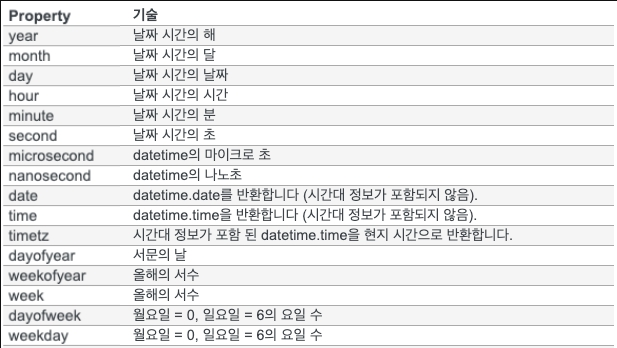

In [17]:
print(ts_date.year)
print(ts_date.month)
print(ts_date.dayofweek)

Index([2023, 2023, 2023], dtype='int32')
Index([1, 2, 3], dtype='int32')
Index([6, 2, 2], dtype='int32')


## dt 속성
- datetime 타입으로 변환된 컬럼(datetime 타입의 Series 객체)에서 연,월,일 시간 등 날짜 정보를 추출하고 싶은 경우에는 dt 속성을 이용해야 한다.

In [18]:
df = pd.DataFrame({'날짜':['2023-01-01','2023-02-01','2023-03-01'],
                  '매출':[1000, 2000, 3000]})
print(df)
print(df.info())

           날짜    매출
0  2023-01-01  1000
1  2023-02-01  2000
2  2023-03-01  3000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3 non-null      object
 1   매출      3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes
None


In [19]:
df['날짜'] = pd.to_datetime(df['날짜'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3 non-null      datetime64[ns]
 1   매출      3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 180.0 bytes
None


In [20]:
print(df['날짜'])

0   2023-01-01
1   2023-02-01
2   2023-03-01
Name: 날짜, dtype: datetime64[ns]


In [21]:
# 1월 매출
print(df[df['날짜'].dt.month == 1])

          날짜    매출
0 2023-01-01  1000


## to_datetime()의 format
- format 속성은 지정한 속성으로 변경하라는 의미가 아닌, 원본 데이터를 주어진 포맷에 맞춰 해석하여 변경하라는 의미
- format 형식 참고 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [12]:
values = {'dates':['05032024','16032024','28032024'],
        'status':['Opened','Opened','Closed']}
df = pd.DataFrame(values)
df['dates'] = pd.to_datetime(df['dates'], format='%d%m%Y') # 지정된 포맷이 아닐시 에러
print(df)

       dates  status
0 2024-03-05  Opened
1 2024-03-16  Opened
2 2024-03-28  Closed


In [13]:
values = {'dates':['05Mar2024','16Mar2024','28Mar2024'],
        'status':['Opened','Opened','Closed']}
df = pd.DataFrame(values)
df['dates'] = pd.to_datetime(df['dates'], format='%d%b%Y') 
print(df)

       dates  status
0 2024-03-05  Opened
1 2024-03-16  Opened
2 2024-03-28  Closed


In [16]:
values = {'dates':['05032024093000','16032024093000','28032024200000'],
        'status':['Opened','Opened','Closed']}
df = pd.DataFrame(values)
df['dates'] = pd.to_datetime(df['dates'], format='%d%m%Y%H%M%S') 
print(df)

                dates  status
0 2024-03-05 09:30:00  Opened
1 2024-03-16 09:30:00  Opened
2 2024-03-28 20:00:00  Closed


## ts.to_period()
- DatetimeIndex 객체를 PeriodIndex 객체로 변환
- freq: 변경하고자 하는 시간 간격

In [17]:
dates = ['2023-01-01','2023-02-01','2023-03-01']
ts_date = pd.to_datetime(dates)
print(ts_date)

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01'], dtype='datetime64[ns]', freq=None)


In [18]:
# 일 간격으로 변환
ps = ts_date.to_period(freq = 'D')
print(ps)

PeriodIndex(['2023-01-01', '2023-02-01', '2023-03-01'], dtype='period[D]')


In [20]:
# 주 간격으로 변환
# 원본 날짜를 포함하는 월-일까지의 주 간격 날짜 데이터 생성
ps = ts_date.to_period(freq = 'W')
print(ps)

PeriodIndex(['2022-12-26/2023-01-01', '2023-01-30/2023-02-05',
             '2023-02-27/2023-03-05'],
            dtype='period[W-SUN]')


In [21]:
# 월 간격으로 변환
ps = ts_date.to_period(freq = 'M')
print(ps)

PeriodIndex(['2023-01', '2023-02', '2023-03'], dtype='period[M]')


In [22]:
# 연 간격으로 변환
ps = ts_date.to_period(freq = 'A')
print(ps)

PeriodIndex(['2023', '2023', '2023'], dtype='period[A-DEC]')


# DataFrame 연산

## Series를 이용한 연산

In [25]:
a = pd.Series(np.arange(1, 6), index = list('abcde'))
print(a)

a    1
b    2
c    3
d    4
e    5
dtype: int32


In [26]:
b = pd.Series(np.arange(4,10), index = list('bcedfg'))
print(b)

b    4
c    5
e    6
d    7
f    8
g    9
dtype: int32


In [27]:
# 동일한 인덱스를 갖는 데이터끼리 연산
print(a+b) # a.add(b)와 동일

a     NaN
b     6.0
c     8.0
d    11.0
e    11.0
f     NaN
g     NaN
dtype: float64


## DataFrame을 이용한 연산

In [29]:
df1 = pd.DataFrame(np.arange(9).reshape((3,3)), columns = list('ABC'))
print(df1)

   A  B  C
0  0  1  2
1  3  4  5
2  6  7  8


In [31]:
df2 = pd.DataFrame(np.arange(16).reshape((4,4)), columns = list('ABCD'))
print(df2)

    A   B   C   D
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


In [32]:
print(df1 + df2) # 결측치가 들어가면 실수형으로 변환

      A     B     C   D
0   0.0   2.0   4.0 NaN
1   7.0   9.0  11.0 NaN
2  14.0  16.0  18.0 NaN
3   NaN   NaN   NaN NaN


## Series와 DataFrame 연산

In [34]:
df = pd.DataFrame(np.arange(16).reshape((4,4)), columns = list('ABCD'))
print(df)

    A   B   C   D
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


In [33]:
s = pd.Series(np.arange(10,14), index = list('ABCD'))
print(s)

A    10
B    11
C    12
D    13
dtype: int32


In [35]:
# DataFrame과 Series를 연산하면 컬럼을 기준으로 브로드캐스팅이 일어난다.
print(df+s)

    A   B   C   D
0  10  12  14  16
1  14  16  18  20
2  18  20  22  24
3  22  24  26  28


In [36]:
s1 = pd.Series(np.arange(10,14))
print(s1)

0    10
1    11
2    12
3    13
dtype: int32


In [37]:
# Series에 DataFrame과 일치하는 컬명을 가지고 있지 않으면 새로운 컬럼으로 추가되고 모든 데이터가 NaN이 된다.
print(df+s1)

    A   B   C   D   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [40]:
# axis를 기준으로 브로드캐스팅이 일어남
print(df.add(s1, axis = 0))

    A   B   C   D
0  10  11  12  13
1  15  16  17  18
2  20  21  22  23
3  25  26  27  28


# 함수 매핑

## map() 함수의 이용
- map()은 함수와 시퀀스형 데이터를 인자로 받아서 각 요소마다 입력받은 함수를 적용한 후 변환

In [41]:
s = pd.Series(np.arange(10))
print(s)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32


In [42]:
print(s.map(lambda x:x**2))

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64


## map() 함수를 이용한 데이터 수정
- 데이터 전처리 중 하나인 labeling이나 one-hot encoding 처리 시 사용

In [43]:
print(s)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32


In [44]:
dic = {1:'A', 2:'B', 3:'C'}
print(s.map(dic))

0    NaN
1      A
2      B
3      C
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
dtype: object


In [58]:
df = pd.read_csv('wages.csv')
print(df.head())

           earn  height     sex   race  ed  age
0  79571.299011   73.89    male  white  16   49
1  96396.988643   66.23  female  white  16   62
2  48710.666947   63.77  female  white  16   33
3  80478.096153   63.22  female  other  16   95
4  82089.345498   63.08  female  white  17   43


In [50]:
print(df['sex'].unique())

['male' 'female']


In [51]:
print(df['race'].unique())

['white' 'other' 'hispanic' 'black']


In [53]:
print(df.shape)
print(df['race'].value_counts())

(1379, 6)
race
white       1147
black        126
hispanic      77
other         29
Name: count, dtype: int64


In [59]:
# 성별을 0, 1로 수정
df['sex'] = df['sex'].map({'male':0,'female':1})
print(df.head(10))

           earn  height  sex      race  ed  age
0  79571.299011   73.89    0     white  16   49
1  96396.988643   66.23    1     white  16   62
2  48710.666947   63.77    1     white  16   33
3  80478.096153   63.22    1     other  16   95
4  82089.345498   63.08    1     white  17   43
5  15313.352901   64.53    1     white  15   30
6  47104.171821   61.54    1     white  12   53
7  50960.054282   73.29    0     white  17   50
8   3212.649556   72.24    0  hispanic  15   25
9  42996.637884   72.40    0     white  12   30


In [61]:
li_race = df['race'].unique()
dic_race = { v:i for i,v in enumerate(li_race)} # v가 i가 됨
df['race'] = df['race'].map(dic_race)
print(df.head(10))

           earn  height  sex  race  ed  age
0  79571.299011   73.89    0     0  16   49
1  96396.988643   66.23    1     0  16   62
2  48710.666947   63.77    1     0  16   33
3  80478.096153   63.22    1     1  16   95
4  82089.345498   63.08    1     0  17   43
5  15313.352901   64.53    1     0  15   30
6  47104.171821   61.54    1     0  12   53
7  50960.054282   73.29    0     0  17   50
8   3212.649556   72.24    0     2  15   25
9  42996.637884   72.40    0     0  12   30


## replace()를 이용한 데이터 수정
- sr.replace() : 정확하게 일치하는 단어를 찾아 바꾼다.
    - 정규표현식에 의해 매칭되는 문자를 찾아 바꾸기 위해서는 regex = True 속성을 지정한다.
- str.replace() : 일부 단어라도 일치하는 단어를 찾아 바꾼다.

In [62]:
df = pd.read_csv('wages.csv')

In [63]:
df['sex'].replace(['male','female'], [0,1], inplace=True)
print(df.head())

           earn  height  sex   race  ed  age
0  79571.299011   73.89    0  white  16   49
1  96396.988643   66.23    1  white  16   62
2  48710.666947   63.77    1  white  16   33
3  80478.096153   63.22    1  other  16   95
4  82089.345498   63.08    1  white  17   43


In [70]:
df = pd.DataFrame({'Code':np.arange(3),
                  'Name':['(S)Note Book', '(S)Note Book', '(S)PC']})
print(df)

   Code          Name
0     0  (S)Note Book
1     1  (S)Note Book
2     2         (S)PC


In [66]:
# 정확히 일치하는 것만 바꾸기 때문에 변경되지 않는다.
df['Name'] = df['Name'].replace('(S)','(M)')
print(df)

   Code          Name
0     0  (S)Note Book
1     1  (S)Note Book
2     2         (S)PC


In [69]:
df['Name'] = df['Name'].replace('\(S\)','(M)', regex = True)
print(df)

   Code          Name
0     0  (M)Note Book
1     1  (M)Note Book
2     2         (M)PC


In [71]:
df['Name'] = df['Name'].str.replace('(S)','(M)')
print(df)

   Code          Name
0     0  (M)Note Book
1     1  (M)Note Book
2     2         (M)PC


## apply() 함수의 사용
- DataFrame에 사용자 정의 함수 적용하기

In [72]:
df = pd.read_csv('wages.csv')
df_sample = df[['earn','height','age']]
print(df_sample.head(10))

           earn  height  age
0  79571.299011   73.89   49
1  96396.988643   66.23   62
2  48710.666947   63.77   33
3  80478.096153   63.22   95
4  82089.345498   63.08   43
5  15313.352901   64.53   30
6  47104.171821   61.54   53
7  50960.054282   73.29   50
8   3212.649556   72.24   25
9  42996.637884   72.40   30


In [73]:
# 각 컬럼의 최대값과 최소값의 차이를 계산
df_sample.apply(lambda x:x.max()-x.min())

earn      318047.708444
height        19.870000
age           73.000000
dtype: float64

In [74]:
# 각 컬럼의 최대값과 최소값을 시리즈 객체로 반환
df_sample.apply(lambda x: pd.Series([x.max(), x.min()], index = ['max','min']))

,earn,height,age
max,317949.127955,77.21,95
min,-98.580489,57.34,22


# DataFrame 합치기

## pd.merge() 함수
- DataFrame이 병합되기 위해서는 각 DataFrame의 공통 컬럼이 필요

In [83]:
df1 = pd.DataFrame({'번호':[10, 20, 30, 40, 50, 60, 70],
                   '이름':['홍길동','임꺽정','전우치','손오공','저팔계','사오정','삼장법사']})
print(df1)

   번호    이름
0  10   홍길동
1  20   임꺽정
2  30   전우치
3  40   손오공
4  50   저팔계
5  60   사오정
6  70  삼장법사


In [84]:
df2 = pd.DataFrame({'번호':[10, 10, 20, 40, 50, 40, 40, 70, 80],
                   '금액': [1000,2500,3000, 4500, 2500, 7000,6000, 4500, 8000]})
print(df2)

   번호    금액
0  10  1000
1  10  2500
2  20  3000
3  40  4500
4  50  2500
5  40  7000
6  40  6000
7  70  4500
8  80  8000


In [85]:
# '번호' column을 공통 키로 사용해 두 데이터프레임을 병합
# inner join : 양 데이터프레임의 공통 키에 한해서 병합
print(pd.merge(df1, df2))

   번호    이름    금액
0  10   홍길동  1000
1  10   홍길동  2500
2  20   임꺽정  3000
3  40   손오공  4500
4  40   손오공  7000
5  40   손오공  6000
6  50   저팔계  2500
7  70  삼장법사  4500


In [86]:
print(pd.merge(df1, df2, how ='outer'))

    번호    이름      금액
0   10   홍길동  1000.0
1   10   홍길동  2500.0
2   20   임꺽정  3000.0
3   30   전우치     NaN
4   40   손오공  4500.0
5   40   손오공  7000.0
6   40   손오공  6000.0
7   50   저팔계  2500.0
8   60   사오정     NaN
9   70  삼장법사  4500.0
10  80   NaN  8000.0


In [87]:
# 왼쪽 데이터프레임에 있는 column 값 기준으로 병합
# df2의 번호 컬럼의 80 값은 df1에 없으므로 누락
print(pd.merge(df1, df2, how ='left'))

   번호    이름      금액
0  10   홍길동  1000.0
1  10   홍길동  2500.0
2  20   임꺽정  3000.0
3  30   전우치     NaN
4  40   손오공  4500.0
5  40   손오공  7000.0
6  40   손오공  6000.0
7  50   저팔계  2500.0
8  60   사오정     NaN
9  70  삼장법사  4500.0


In [88]:
print(pd.merge(df1, df2, how ='right'))

   번호    이름    금액
0  10   홍길동  1000
1  10   홍길동  2500
2  20   임꺽정  3000
3  40   손오공  4500
4  50   저팔계  2500
5  40   손오공  7000
6  40   손오공  6000
7  70  삼장법사  4500
8  80   NaN  8000


## join on
- 병합할 데이터프레임에 같은 이름을 갖는 컬럼이 없거나 반대로 동일 컬럼명이 여러개일 경우 병합에 사용할 공통기를 명시적으로 기재하는 방식

In [89]:
df1 = pd.DataFrame({'번호':[10, 20, 30, 40, 50, 60, 70],
                   '이름':['홍길동','임꺽정','전우치','손오공','저팔계','사오정','삼장법사']})
print(df1)

df2 = pd.DataFrame({'고객번호':[10, 10, 20, 40, 50, 40, 40, 70, 80],
                   '금액': [1000,2500,3000, 4500, 2500, 7000,6000, 4500, 8000]})
print(df2)

   번호    이름
0  10   홍길동
1  20   임꺽정
2  30   전우치
3  40   손오공
4  50   저팔계
5  60   사오정
6  70  삼장법사
   고객번호    금액
0    10  1000
1    10  2500
2    20  3000
3    40  4500
4    50  2500
5    40  7000
6    40  6000
7    70  4500
8    80  8000


In [92]:
# 공통 컬럼명이 없는 경우 오류발생
# print(pd.merge(df1, df2))
print(pd.merge(df1, df2, left_on = '번호', right_on = '고객번호'))

   번호    이름  고객번호    금액
0  10   홍길동    10  1000
1  10   홍길동    10  2500
2  20   임꺽정    20  3000
3  40   손오공    40  4500
4  40   손오공    40  7000
5  40   손오공    40  6000
6  50   저팔계    50  2500
7  70  삼장법사    70  4500
